## Problem Statement
You are provided with a dataset containing various attributes of different wine samples. The goal of this assignment is to perform cluster analysis using the K-means algorithm to identify natural groupings in the data based on the attributes provided.

## Dataset Overview
The dataset consists of the following columns:
1. **Alcohol**: Alcohol content in the wine sample.
2. **Malic_Acid**: Amount of malic acid in the wine.
3. **Ash**: Ash content in the wine.
4. **Ash_Alcalinity**: Alkalinity of ash in the wine.
5. **Magnesium**: Magnesium content in the wine.
6. **Total_Phenols**: Total phenols content in the wine.
7. **Flavanoids**: Flavonoid content in the wine.
8. **Nonflavanoid_Phenols**: Non-flavonoid phenol content in the wine.
9. **Proanthocyanins**: Proanthocyanin content in the wine.
10. **Color_Intensity**: Intensity of the color of the wine.
11. **Hue**: Hue of the wine.
12. **OD280**: Ratio of OD280/OD315 of diluted wines.
13. **Proline**: Proline content in the wine.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('WineData.csv')
df.head()

,Unnamed: 0,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Tasks

### Task 1: Data Preprocessing
- Handle any missing values if present.
- Scale the data using `StandardScaler` or `MinMaxScaler` since K-means is sensitive to the scale of features.
- Remove any unnecessary columns that don't contribute to clustering (e.g., index column if not relevant).

In [4]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
df_scaled=scaler.fit_transform(df)

In [7]:
df_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### Task 2: Determine the Optimal Number of Clusters
- Use the **Elbow method** to determine the optimal number of clusters.
- Visualize the results using a line plot of the **Within-Cluster Sum of Squares (WCSS)** against the number of clusters.



In [8]:
from sklearn.cluster import KMeans

In [9]:
wcss=[]
cluster=range(1, 15)
for k in cluster:
    clst=KMeans(n_clusters=k)
    clst.fit(df_scaled)
    wcss.append(clst.inertia_)

In [10]:
import matplotlib.pyplot as plt

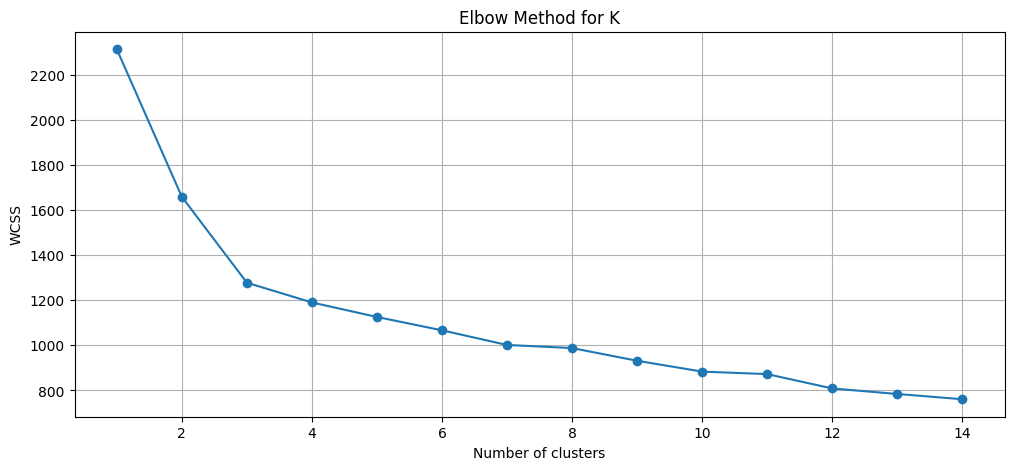

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(range(1,15), wcss, marker='o')
plt.grid()
plt.title('Elbow Method for K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
!pip install kneed

In [13]:
from kneed import KneeLocator

In [14]:
kneedle = KneeLocator(cluster, wcss, curve="convex", direction="decreasing")

[]

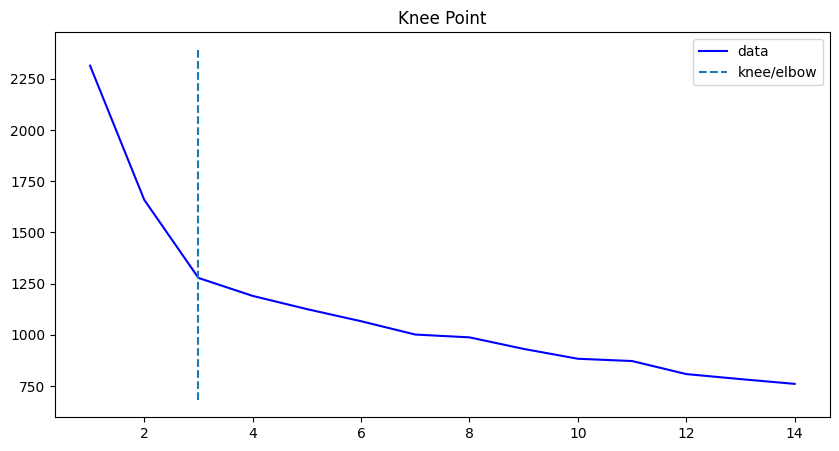

In [15]:
kneedle.plot_knee(figsize=(10,5))
plt.plot()

In [16]:
kneedle.knee

np.int64(3)

### Task 3: K-means Clustering
- Apply K-means clustering using the optimal number of clusters obtained from the Elbow method.
- Assign cluster labels to each data point and create a new column in the dataset with these labels.



In [17]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto")

In [18]:
y_kmeans = kmeans.fit_predict(df_scaled)

In [19]:
df['Cluster']=y_kmeans

In [20]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [21]:
from sklearn.decomposition import PCA
import seaborn as sns

In [22]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [23]:
pca_df = pd.DataFrame(data=df_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']

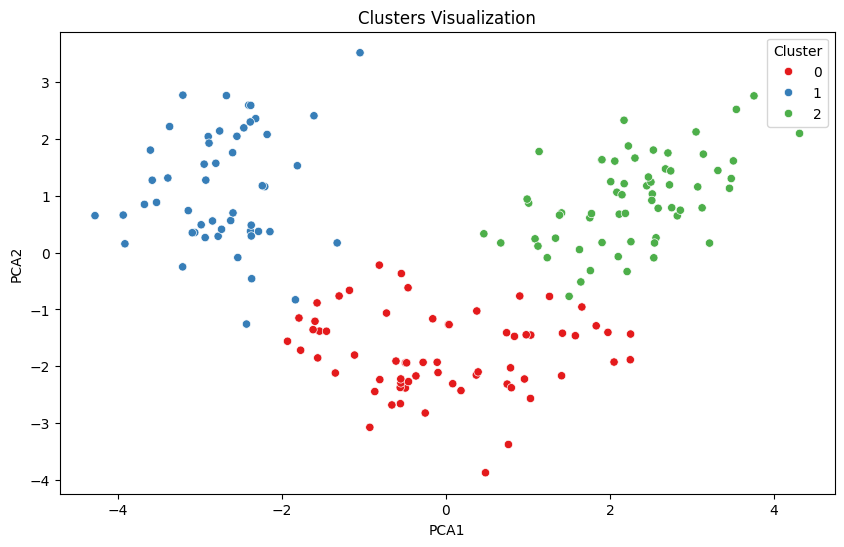

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('Clusters Visualization')
plt.show()

### Task 4: Cluster Analysis
- Analyze the clusters by comparing the mean values of each feature within each cluster.
- Visualize the clusters using a pairplot or scatterplot for selected features to understand the separations visually.



In [25]:
import seaborn as sns

In [26]:
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

           Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
Cluster                                                              
0        12.250923    1.897385  2.231231     20.063077   92.738462   
1        13.134118    3.307255  2.417647     21.241176   98.666667   
2        13.676774    1.997903  2.466290     17.462903  107.967742   

         Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
Cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         Color_Intensity       Hue     OD280      Proline  
Cluster                                                    
0               2.973077  1.062708  2.803385   510.169231  
1               7.234706  0.691961  1.696667   619.058824  
2               5.45354

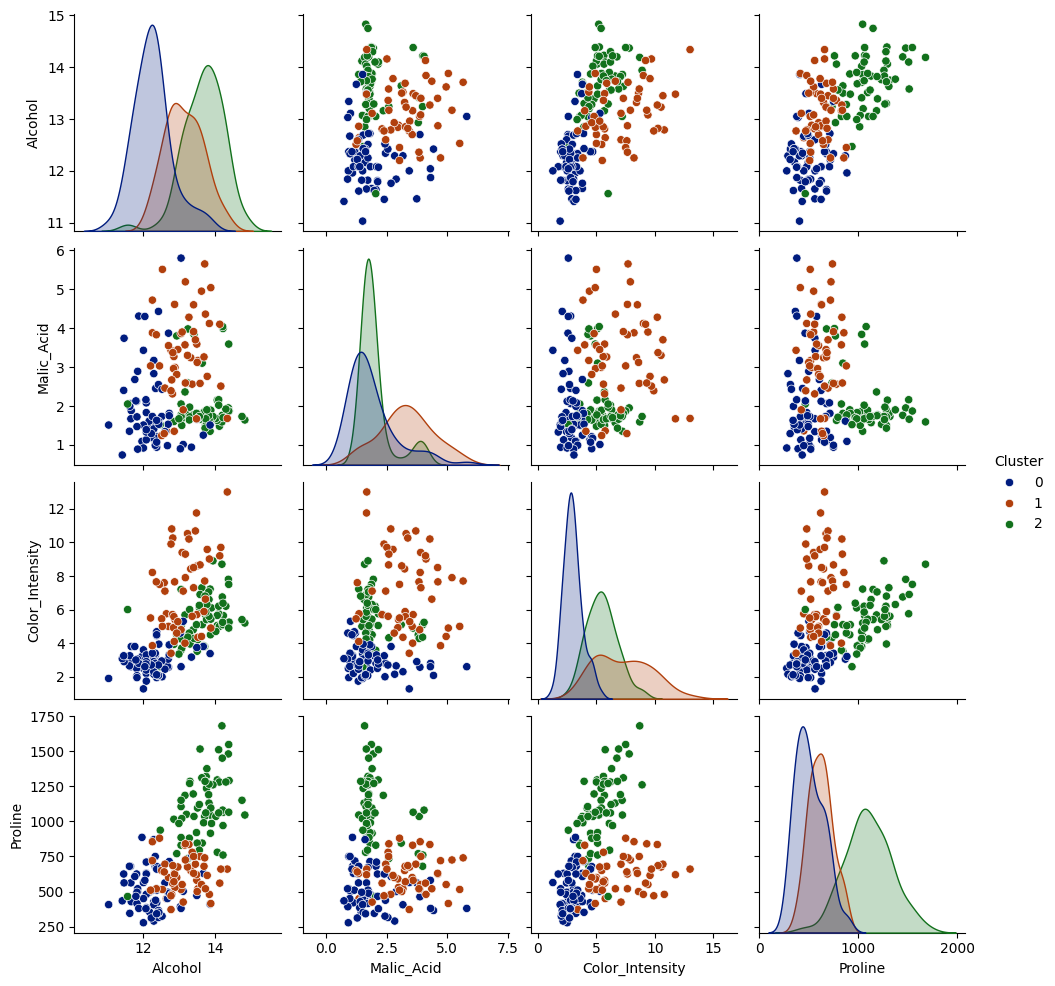

In [27]:
import seaborn as sns
palette = sns.color_palette("dark", n_colors=len(df['Cluster'].unique()))
sns.pairplot(df, hue='Cluster', vars=['Alcohol', 'Malic_Acid', 'Color_Intensity', 'Proline'],palette=palette)
plt.show()

### Task 5: Interpretation
- Interpret the characteristics of each cluster. For example, identify which cluster has the highest alcohol content, or which has the most intense color, etc.
- Suggest potential names or categories for each cluster based on the observed characteristics.


### Cluster 0:
1. **Alcohol (12.25):** This cluster has the lowest alcohol content, meaning these wines are lighter in alcohol strength.
2. **Malic Acid (1.89):** This value is moderate, indicating a medium acidity level.
3. **Ash (2.23):** The amount of ash is moderate, indicating average mineral content.
4. **Ash Alcanity (20.06):** This shows a moderate level of alkalinity, indicating the buffering capacity of the wine.
5. **Magnesium (92.73):** This is a moderate magnesium level compared to other clusters.
6. **Total Phenols (2.24) and Flavanoids (2.05):** These values suggest moderate levels of phenols and flavonoids, indicating a balanced antioxidant and flavor profile.
7. **Color Intensity (2.97):** This is the lowest color intensity, meaning these wines are light in color.
8. **Hue (1.06):** This hue value is high, indicating that these wines have a relatively lighter, more yellowish hue.
9. **Proline (510):** The lowest proline content, suggesting these wines are simpler and less complex.
10. **Interpretation:** "Light and Easy Wines" – Cluster 0 represents lighter wines with moderate acidity and flavor, less intense color, and a simpler profile.

### Cluster 1:
1. **Alcohol (13.13):** These wines have a moderate alcohol content, meaning they are neither too light nor too strong.
2. **Malic Acid (3.30):** The highest malic acid value, indicating higher acidity, which might make these wines taste more tart or fresh.
3. **Ash (2.41):** A slightly higher ash content, indicating a more mineral-rich composition.
4. **Ash Alcanity (21.24):** Higher alkalinity indicates a stronger buffering capacity.
5. **Magnesium (98.67):** A moderate magnesium level.
6. **Total Phenols (1.68) and Flavanoids (0.81):** These values are the lowest among the clusters, meaning these wines have lower antioxidant levels and potentially less complex flavors.
7. **Color Intensity (7.23):** The highest color intensity, suggesting that these wines are darker in color.
8. **Hue (0.69):** The lowest hue value, indicating a more reddish or darker hue.
9. **Proline (619):** A moderate proline level, indicating moderate quality.
10. **Interpretation:** "Bold Acidic Wines" – Cluster 1 represents wines with high acidity, intense color, and simpler flavor profiles due to the lower phenol and flavonoid content.

### Cluster 2:
1. **Alcohol (13.67):** Th**e highest alcohol content, meaning these wines are stronger and more potent.
5. **Malic Acid (1.99):**** This cluster has a lower malic acid value, indicating lower acidity, which might make these wines smoother or less sharp.
6. **Ash (2.47):** The highest ash content, indi**cating more minerals.
7. **Ash Alcanity (17.46):**** The lowest alkalinity, meaning a weaker buffering capacity.
5. **Magnesium (107.97):** The highest magnesium content, which may contribute to a richer mineral profile.
6. **Total Phenols (2.84) and Flavanoids (3.00):** These are the highest values, suggesting rich flavors and higher antioxidant levels.
7. **Color Intensity (5.45):** Moderate color intensity, meaning these wines have a decent amount of color but not as dark as Cluster 1.
8. **Hue (1.06):** A high hue value, indicating a lighter, more yellowish hue.
9. **Proline (1100):** The highest proline content, often associated with quality and richness.
10. **Interpretation:** "Premium Rich Wines" – Cluster 2 represents wines with high alcohol content, rich flavors, moderate color, and high quality, as indicated by the high phenols, flavonoids, and proline content.




### **Cluster Characteristics Summary:**


#### Cluster 0 ("Light and Easy Wines"):

Low alcohol and low color intensity, making them lighter wines.
Moderate acidity, balanced phenol content, and simple flavors.
These wines are likely to be easy-drinking, with less complexity.

#### **Cluster 1 ("Bold Acidic Wines"):**
High acidity and dark color with **low flavonoid and phenol content.
These wines might taste more tart and fresh but with simpler flavor profiles.
They are bold, but not as rich in flavor complexity.

#### **Cluster 2 ("Premium Rich Wines"):**
High alcohol content, rich flavors, and high quality.
These wines are the most complex, with high phenol and flavonoid levels, indicating strong antioxidant properties and a richer profile.
Likely premium wines with a strong and balanced flavor.